In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load the image and grayscale conversion
#A = imread(os.path.join('..','DATA','dog.jpg')) #to run from github
A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale
print(X.shape)

(2000, 1500)


In [3]:
# Taking the Economy SVD of the image
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
U.shape

(2000, 1500)

In [11]:
for r in (10, 25, 100):
    # Construct approximate image
    X_approx = U[:,:r] @ S[0:r,:r] @ VT[:r,:] 
    #frobenius norm
    e = np.linalg.norm(X-X_approx, 'fro')/ np.linalg.norm(X, 'fro')
    #square the error
    variance=e*e
    print(e,variance)

0.12234347696916124 0.014967926356903688
0.07799368639404565 0.006083015117332741
0.03691971485030717 0.0013630653446279918


In [12]:
def error(r):
    Xr = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    e = np.linalg.norm(X-Xr, 'fro')/ np.linalg.norm(X, 'fro')
    variance = e*e
    return(e,variance)

In [14]:
Error=[]
var=[]
cummulative_sum=[]
r_values=[]

for i in range(1, 1500, 5):
    e,variance=error(i)
    Error.append(1-e)
    var.append(1-variance)
    cumsum.append(np.cumsum(np.diag(S))[i-1]/np.sum(np.diag(S)))
    r_values.append(i)

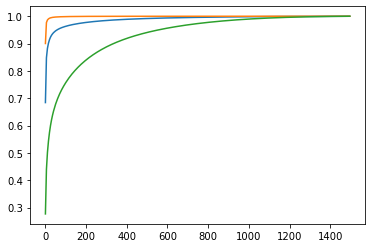

In [10]:
plt.plot(r_values, Error)
plt.plot(r_values, var)
plt.plot(r_values, cummulative_sum)